# Weather Analysis for Edinburgh and New York 

## Import libraries and csv containing dataset

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time, date
import time

# Import csv
edinburgh_raw = pd.read_csv('./data/IEDINBUR6_weather.csv')
print(type(edinburgh_raw))

<class 'pandas.core.frame.DataFrame'>


In [2]:
# View first few rows of the dataset
edinburgh_raw.head()

,Unnamed: 0,Time,TemperatureC,DewpointC,PressurehPa,WindDirection,WindDirectionDegrees,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,Conditions,Clouds,dailyrainMM,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station
0,0,2015-01-01 00:00:00,10.3,4.5,1001.9,SW,236,9.0,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:00:00,IEDINBUR6
1,1,2015-01-01 00:06:00,10.2,4.4,1001.9,SW,226,6.9,7.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:06:00,IEDINBUR6
2,2,2015-01-01 00:11:00,10.2,4.4,1001.9,SSW,202,7.2,15.8,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:11:00,IEDINBUR6
3,3,2015-01-01 00:16:00,10.2,4.4,1001.9,SSW,202,7.9,11.9,67,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:16:00,IEDINBUR6
4,4,2015-01-01 00:21:00,10.2,4.6,1002.3,South,174,4.3,7.9,68,0.0,NaN,NaN,0.0,0.0,HP1001 V1.1.3,2015-01-01 00:21:00,IEDINBUR6


## Extract temperature data

Rename the temp and date columns, then extract only those columns and save to a new data frame

In [3]:
# Rename temp and date column and convert temp to float, and date to datetime64
edinburgh_raw['temp'] = edinburgh_raw['TemperatureC'].astype(float)
edinburgh_raw['date'] = pd.to_datetime(edinburgh_raw['DateUTC'])


# Extract only date and temperature data
edinburgh_data = edinburgh_raw.loc[:,['date', 'temp']]

In [4]:
# View the segment of the data set we've selected
edinburgh_data.head()

,date,temp
0,2015-01-01 00:00:00,10.3
1,2015-01-01 00:06:00,10.2
2,2015-01-01 00:11:00,10.2
3,2015-01-01 00:16:00,10.2
4,2015-01-01 00:21:00,10.2


## Calculate daily averages

For rows that share the same date, calculate the average temp of each group. Create a new dataframe with avg_daily_temp

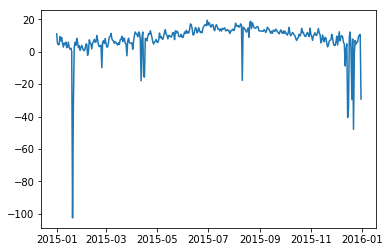

In [5]:
# Use .describe() to get an idea of what's in the dataset
edinburgh_data.describe()

# Strip time from date column
edinburgh_data['date'] = edinburgh_data['date'].apply(lambda edinburgh_data : 
datetime(year=edinburgh_data.year, month=edinburgh_data.month, day=edinburgh_data.day))

# Group by day, calculate mean of each day
edi_group = edinburgh_data.groupby('date').agg({'temp': 'mean'})

# Plot the grouped data
plt.plot(edi_group)
plt.show()

## Removing outliers

The weather in Edinburgh shouldn't be getting below -20C ever...let's filter this dataset a bit

# Next steps
 Clean up the dataset, convert tempC to tempF, plot vs time